In [9]:
# Set up
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps
import control as ct
from control.matlab import *

a = 4
b = 5
c = 3

poles of Plant: [-56.3+0.j  -9.2+0.j]
zeros of Plant: [-39.2+0.j]


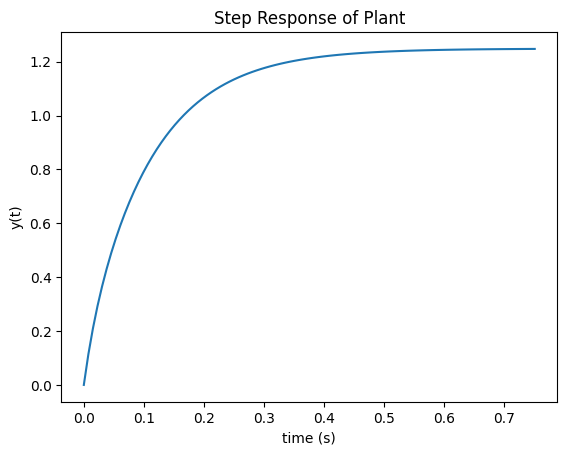

Settling time of the plant 0.41713498061486337
Rise time of the plant 0.22752817124447094
Steady State Value of the plant 1.2487450768399107
Percent overshoot of the plant 0.0


In [10]:
# investigate the plant
Np = 5.5 * c * np.array([ 1, 7.3*a + 2*b])
Dp = np.polymul(np.array([1, 2.3*a]), np.array([1, 8.7*a + 3.1*b + 2*c]))

Gp = tf(Np,Dp)      # plant
print("poles of Plant:", pole(Gp))
print("zeros of Plant:", zero(Gp))

y, t = step(Gp)
plt.plot(t,y)
plt.title("Step Response of Plant")
plt.xlabel("time (s)")
plt.ylabel("y(t)")
plt.show()
info = ct.step_info(Gp)
print("Settling time of the plant", info['SettlingTime'])
print("Rise time of the plant", info['RiseTime'])
print("Steady State Value of the plant", info['SteadyStateValue'])
print("Percent overshoot of the plant", info['Overshoot'])


c:\Users\Lachl\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


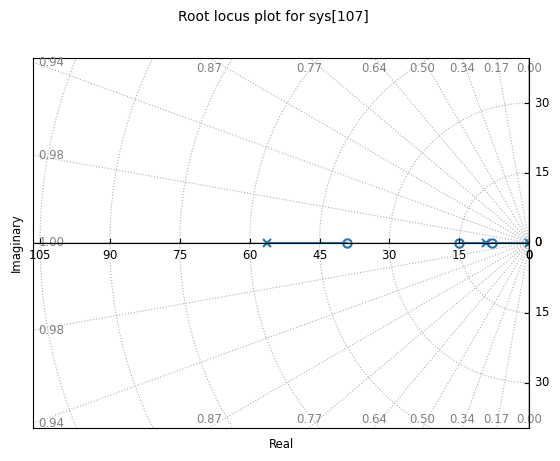

In [23]:
# Ideal PID controller
# will add practical part later

z1 = 8
z2 = 15
k = 0.2

Nc = k * np.polymul( np.array([1, z1]), np.array([1, z2]))
Dc = np.array([1, 0])
Gc = tf(Nc, Dc)     #Controller 

# Plot the root locus
Go = series(Gp,Gc)  # open loop 
R, K = rlocus(Go, plot=True)


poles of Plant: [-433.95977651+0.j  -42.7105352 +0.j  -11.62549708+0.j   -7.20419121+0.j]
zeros of Plant: [-39.2+0.j -15. +0.j  -8. +0.j]
Settling time of system 0.30433691711391936
Steady State Value of the system 1.0
Percent overshoot of the system 0.0


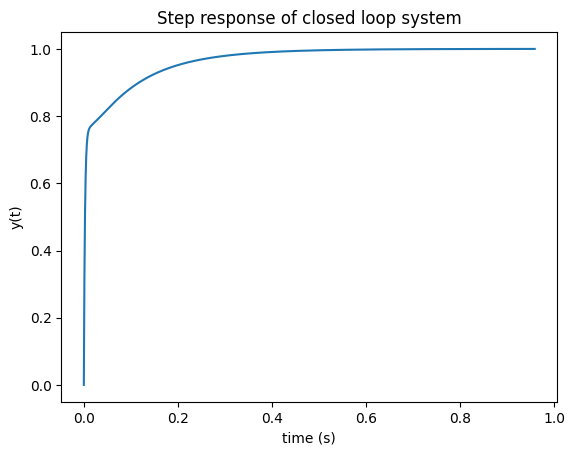

In [24]:
# add in Td term and plot Gcl
Td = 0.01

Nc = np.polymul( np.array([1, z1]), np.array([1, z2]))
Dc = np.polymul( np.array([1, 0]), np.array([Td, 1]))
Gc = tf(Nc, Dc)     #Controller 

Go = series(Gp,Gc)

Gideal = tf([1], [1])
Gcl = feedback(k*Go, Gideal)
print("poles of Plant:", pole(Gcl))
print("zeros of Plant:", zero(Gcl))
info = ct.step_info(Gcl)

print("Settling time of system", info['SettlingTime'])
print("Steady State Value of the system", info['SteadyStateValue'])
print("Percent overshoot of the system", info['Overshoot'])

y, t = step(Gcl)
plt.plot(t,y)
plt.title("Step response of closed loop system")
plt.xlabel("time (s)")
plt.ylabel("y(t)")
plt.show()